# Chapter 3 - Coupled Oscillations

Making animations for the coupled oscillator.

Need to make:

* y1 = 1, y2 = 0 --> asymmetric mode
* y1 = 0, y2 = 1 --> symmetric mode
* General case

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines
import matplotlib.patches as patches



#Animations
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [16]:
### Using http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

## Steps I'm doing to make it work:
## 1. Installing homebrew
## 2. brew install imagemagick
## 3. brew install ffmpeg

! arch -arm64 brew install ffmpeg

==> Downloading https://ghcr.io/v2/homebrew/core/ffmpeg/manifests/6.1.1_2
######################################################################### 100.0%
==> Fetching dependencies for ffmpeg: aribb24, dav1d, frei0r, graphite2, icu4c, harfbuzz, lame, fribidi, libunibreak, libass, libbluray, cjson, libmicrohttpd, mbedtls, librist, libsoxr, libvidstab, libogg, libvorbis, libvpx, opencore-amr, opus, rav1e, libsamplerate, flac, mpg123, libsndfile, rubberband, sdl2, snappy, speex, srt, svt-av1, leptonica, libb2, libarchive, pango, tesseract, theora, x264, xvid, libsodium, zeromq and zimg
==> Downloading https://ghcr.io/v2/homebrew/core/aribb24/manifests/1.0.4
######################################################################### 100.0%
==> Fetching aribb24
==> Downloading https://ghcr.io/v2/homebrew/core/aribb24/blobs/sha256:60ea5e1c7b
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/dav1d/manifests/1.3.0
##

######################################################################### 100.0%
==> Fetching theora
==> Downloading https://ghcr.io/v2/homebrew/core/theora/blobs/sha256:b4b1fe0a53c
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/x264/manifests/r3108
######################################################################### 100.0%
==> Fetching x264
==> Downloading https://ghcr.io/v2/homebrew/core/x264/blobs/sha256:65babfc775b28
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/xvid/manifests/1.3.7
######################################################################### 100.0%
==> Fetching xvid
==> Downloading https://ghcr.io/v2/homebrew/core/xvid/blobs/sha256:58aa3f757ca26
######################################################################### 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libsodium/manifests/1.0.19

==> Pouring libbluray--1.3.4.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/libbluray/1.3.4: 21 files, 1MB
==> Installing ffmpeg dependency: cjson
==> Downloading https://ghcr.io/v2/homebrew/core/cjson/manifests/1.7.17
Already downloaded: /Users/dk19013/Library/Caches/Homebrew/downloads/cf55fa70fee20f7c1e02503108e2d0d5981d3209c4ca43763fcd623d1f60ccb8--cjson-1.7.17.bottle_manifest.json
==> Pouring cjson--1.7.17.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/cjson/1.7.17: 23 files, 254.2KB
==> Installing ffmpeg dependency: libmicrohttpd
==> Downloading https://ghcr.io/v2/homebrew/core/libmicrohttpd/manifests/0.9.77
Already downloaded: /Users/dk19013/Library/Caches/Homebrew/downloads/8fd2754d3776e5f75f2bb8fb5f299905800b38a153682343b3394e554fcc066c--libmicrohttpd-0.9.77.bottle_manifest.json
==> Pouring libmicrohttpd--0.9.77.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/libmicrohttpd/0.9.77: 24 files, 1.3MB
==> Installing ffmpeg dependency: mbedtls
==> Downloading https://gh

==> Pouring sdl2--2.28.5.arm64_ventura.bottle.1.tar.gz
🍺  /opt/homebrew/Cellar/sdl2/2.28.5: 93 files, 6.4MB
==> Installing ffmpeg dependency: snappy
==> Downloading https://ghcr.io/v2/homebrew/core/snappy/manifests/1.1.10
Already downloaded: /Users/dk19013/Library/Caches/Homebrew/downloads/66500196008160ff18d67179e002e417a71c59707d74a6706c2e89a8aa2411b8--snappy-1.1.10.bottle_manifest.json
==> Pouring snappy--1.1.10.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/snappy/1.1.10: 18 files, 164.2KB
==> Installing ffmpeg dependency: speex
==> Downloading https://ghcr.io/v2/homebrew/core/speex/manifests/1.2.1
Already downloaded: /Users/dk19013/Library/Caches/Homebrew/downloads/483f702af62f72259facb50d3d47cd0bb25c8f0fb887029d30051a8cef860be5--speex-1.2.1.bottle_manifest.json
==> Pouring speex--1.2.1.arm64_ventura.bottle.tar.gz
🍺  /opt/homebrew/Cellar/speex/1.2.1: 25 files, 855.5KB
==> Installing ffmpeg dependency: srt
==> Downloading https://ghcr.io/v2/homebrew/core/srt/manifests/1.5.3
Al

In [ ]:
##### Set up initial parameters

m = 1
k = 1

t = np.linspace(0,2,1000)

kab = 1

A1 = 1
omega_1 = np.sqrt(k/m)
phi_1 = 0

A2 = 1
omega_2 = np.sqrt((k+2*kab)/m)
phi_2 = 0

x_1 = 0.5*A1*np.cos((omega_1*t) + phi_1) + 0.5*A2*np.cos((omega_2*t)+phi_2)
x_2 = 0.5*A1*np.cos((omega_1*t) + phi_1) - 0.5*A2*np.cos((omega_2*t)+phi_2)

# Defining the animation parameters

size_of_font = 15

duration_of_anim = 2 #seconds
frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
sample = 100
number_of_points = 1000
x_limit = 2

NameError: name 'x' is not defined

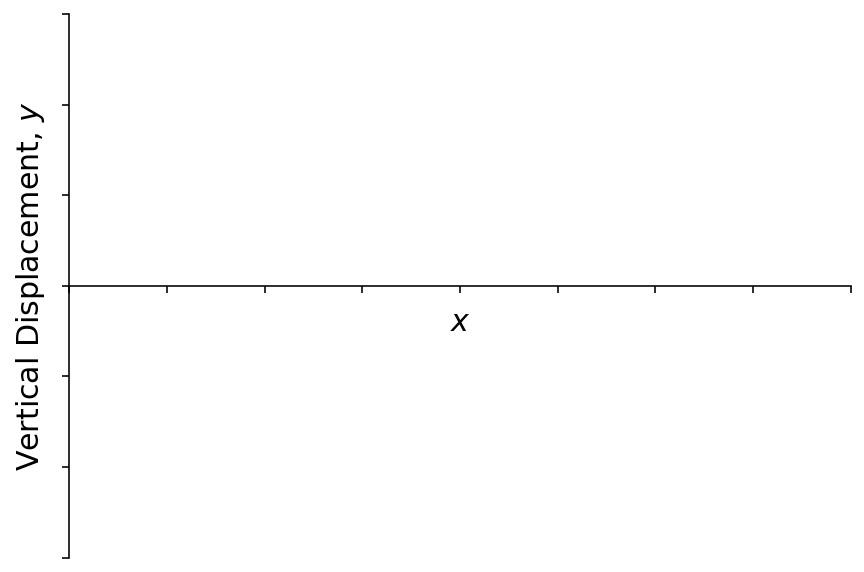

In [10]:
# First set up the figure, the axis, and the plot element we want to animate
#fig, ax = plt.subplots(figsize=(7,5))
#
#ax.set_xlim(( 0, 2))
#ax.set_ylim((-1.5, 1.5))
#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
#ax.set_xlabel('$x$',fontsize=size_of_font)
#
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.spines["left"].set_position(("data",0))
#ax.spines["bottom"].set_position(("data",0))
#
#ax.axvline(x=x[sample],linewidth=0.5,color='r',linestyle="--")
#


#line, = ax.plot([], [], lw=0.5,linestyle='-')

#point, = ax.plot([],[],'o',markersize=20,color='orange')

#ax.plot(disp_x[sample],wave(disp_x[sample],time_coord),'o',color='blue',markersize=5)



# initialization function: plot the background of each frame
#def init():
#    line.set_data([], [])
#    point.set_data([],[])
#    return (line,)

# animation function. This is called sequentially
#def animate(i):
#    y = np.sin(2 * np.pi * (x - 0.04 * i)) # The scalar on i helps us with the frame rates! scalar*frames must equal 1
#    y_point=np.sin(2*np.pi*(x[sample]-0.04*i)) 
#    line.set_data(x[sample:], y[sample:])
#    point.set_data(x[sample],y_point)
#    return (line,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=20, blit=True)
#anim
anim.save('ch3-coupledosc1.gif', writer='imagemagick', fps=15)
plt.savefig('ch3-coupledosc1.pdf',transparent=True)


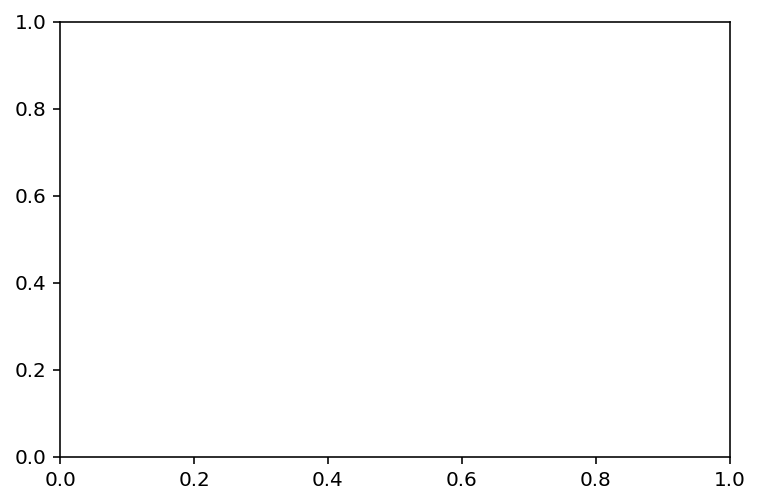

In [14]:
# Trying this one https://stackoverflow.com/questions/66379984/animating-pendulums-in-jupyter-notebook-using-python

%matplotlib inline
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

#l = 0.25 # length of pendulum
A = 0.2 # amplitude of oscillation

## create a list of angles, convert to radians
#theta_points_approx = [5.0,4.8,4.2,3.2,2.1,1.9,0.2,-1.2,-2.2,-3.1,-3.9,-4.6,-5.0]
#theta_points_approx_rad = []
#for ang in theta_points_approx:
#    theta_points_approx_rad.append(ang*np.pi/180)

# create a list of times
time = np.linspace(0,2,100)

# create blank window for animation
fig = plt.figure()
axis = plt.axes()

# pend_approx, = axis.plot([], [], lw=2)

point, = ax.plot([],[], 'o', markersize=20, color='orange')

#create a function to draw the background of our animations
def init():
    point.set_data([], [])
    return(point,)

# # initialize empty sets for x and y coordinates
# x_points_to_plot = []
# y_points_to_plot = []

# # animation function
# def animate(theta):
#     x = [0,l*np.sin(theta)]
#     y = [0,-l*np.cos(theta)]
#     pend_approx.set_data(x,y)
#     return(pend_approx,)

# animation function
def animate(t):
    x_point = np.sin(2*np.pi*t)
    point.set_data(x_point,0)
    return(point,)

# compile animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=time, interval=40, blit=True)
anim.save('ch3-test1.gif', writer='imagemagick', fps=15)
plt.show()

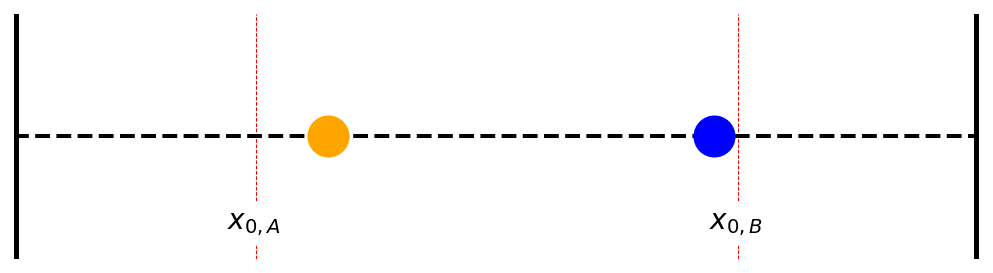

In [28]:
## Trying to adapt the vertical oscillation animation i prepared years ago...

size_of_font = 15

duration_of_anim = 2 #seconds
frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
sample1 = 2
sample2 = 10
number_of_points = 20
x_limit = 2

x = np.linspace(0, 2, 20)

time = np.linspace(0,2,20)

m = 1
k = .1
kab = 1

A1 = 0.4
omega_1 = np.sqrt(k/m)
phi_1 = 0

A2 = 0.4
omega_2 = np.sqrt((k+2*kab)/m)
phi_2 = 0


x_a = -1
x_b = 1



# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(7,2))

ax.set_xlim(( -2, 2))
ax.set_ylim((-0.5, 0.5))
#ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
#ax.set_ylabel('',fontsize=size_of_font)
#ax.set_xlabel('$x$',fontsize=size_of_font)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))

ax.axvline(x=1,linewidth=0.5,color='r',linestyle="--")
ax.axvline(x=-1,linewidth=0.5,color='r',linestyle="--")
ax.axhline(y=0,linewidth=2,color='k',linestyle="--")

ax.axvline(x=2,linewidth=5,color='k',linestyle="-")
ax.axvline(x=-2,linewidth=5,color='k',linestyle="-")

props = dict(lw=0,facecolor='white', alpha = 1)
ax.text(0.22,0.2, '$x_{0,A}$', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props )
ax.text(0.72,0.2, '$x_{0,B}$', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props )

line, = ax.plot([], [], lw=0.5,linestyle='-')

point1, = ax.plot([],[],'o',markersize=20,color='orange')
point2, = ax.plot([],[],'o',markersize=20,color='blue')



# initialization function: plot the background of each frame
def init():
    point1.set_data([],[])
    point2.set_data([],[])
    return (line,)

def animate(i):
    x_1 = (0.5*A1*np.cos(2*np.pi*omega_1*(1-0.04*i))) + (0.5*A2*np.cos(2*np.pi*omega_2*(1-0.04*i))) + x_a
    x_2 = (0.5*A1*np.cos(2*np.pi*omega_1*(1-0.04*i))) - (0.5*A2*np.cos(2*np.pi*omega_2*(1-0.04*i))) + x_b
    point1.set_data(x_1,0)
    point2.set_data(x_2,0)
    return (point1,point2,)

# x_1 = 0.5*A1*np.cos((omega_1*t) + phi_1) + 0.5*A2*np.cos((omega_2*t)+phi_2)
# x_2 = 0.5*A1*np.cos((omega_1*t) + phi_1) - 0.5*A2*np.cos((omega_2*t)+phi_2)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=250, interval=20, blit=True)

#anim
plt.tight_layout()
anim.save('ch3-coupled_resonance2.gif', writer='imagemagick', fps=30)
plt.savefig('ch3-coupled_resonance2.pdf',transparent=True)

anim

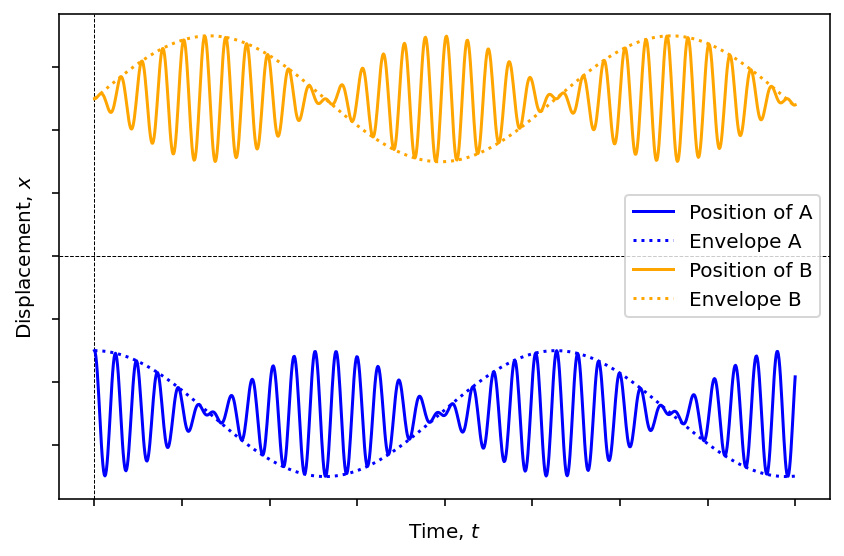

In [47]:
# let's plot the graph of the above

# time exists above
# omega_1 defined above
# omega_2 defined above
# k and k_ab defined above
# x_a and x_b defined above

time = np.linspace(0,200,1000)

#m = 1
k = 1
kab = .1
#
#A1 = 0.4
omega_1 = np.sqrt(k/m)
#phi_1 = 0
#
#A2 = 0.4
omega_2 = np.sqrt((k+2*kab)/m)
#phi_2 = 0
#

def osc_a(t):
    x_ad = -0.5+0.5*A1*np.cos(0.5*(omega_2-omega_1)*t)*np.cos(0.5*(omega_2+omega_1)*t)
    return x_ad

def env_a(t):
    a_env = -0.5+0.5*A1*np.cos(0.5*(omega_2-omega_1)*t)
    return a_env

def osc_b(t):
    x_bd = 0.5+0.5*A2*np.sin(0.5*(omega_2-omega_1)*t)*np.sin(0.5*(omega_2+omega_1)*t)
    return x_bd

def env_b(t):
    b_env = 0.5+0.5*A1*np.sin(0.5*(omega_2-omega_1)*t)
    return b_env

#plt.xkcd(scale=5, length=3500, randomness=20)

fig = plt.figure()

ax = plt.axes()


ax.set_ylabel('Displacement, $x$')
ax.set_xlabel('Time, $t$')

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")
#plt.text(10, 4,'Phase shift, $\delta = $'+str(delta_2), ha="right", va="center", size=10)
ax.plot(time, osc_a(time),color='blue',label='Position of A')
ax.plot(time,env_a(time),color='blue',linestyle="dotted",label='Envelope A')
ax.plot(time, osc_b(time),color='orange',label = 'Position of B')
ax.plot(time,env_b(time),color='orange',linestyle="dotted",label='Envelope B')

#ax.plot(t, -A_0*damp(t),color='orange',linestyle='--')
#ax.plot(t, shm(t,delta_1),color='gray',linestyle='dotted')

ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')


ax.legend()

plt.tight_layout()
plt.savefig('ch3-coupled-osc-chart1.pdf',transparent=True)
plt.savefig('ch3-coupled-osc-chart1.svg',transparent=True)

#plt.title('Test')
plt.show()